In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
# matplotlib inline
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetstock.csv to datasetstock.csv


In [41]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['datasetstock.csv']))
print(dataset)

         Date  Prev Close  ...  Deliverable Qty  % Dly Qt to Traded Qty
0   22-Nov-21     2473.30  ...          6257212                   56.20
1   23-Nov-21     2363.75  ...          7161105                   61.27
2   24-Nov-21     2385.85  ...          4345352                   55.98
3   25-Nov-21     2351.40  ...          9245255                   47.25
4   26-Nov-21     2492.95  ...          2921250                   40.16
..        ...         ...  ...              ...                     ...
59  14-Feb-22     2376.40  ...          2751275                   55.61
60  15-Feb-22     2338.55  ...          2563105                   49.53
61  16-Feb-22     2417.95  ...          2607957                   54.37
62  17-Feb-22     2412.95  ...          2872619                   48.43
63  18-Feb-22     2443.50  ...          1216161                   38.89

[64 rows x 13 columns]


In [43]:
dataset['Date']= pd.to_datetime(dataset.Date)

In [42]:
dataset.shape

(64, 13)

In [ ]:
dataset.drop('Prev Close', axis=1, inplace = True)
dataset.drop('Close Price', axis=1, inplace= True)


In [53]:
dataset.drop('Total Traded Quantity', axis=1, inplace= True)
dataset.drop('Turnover', axis=1, inplace= True)

In [55]:
dataset.drop('Deliverable Qty', axis=1, inplace= True)
dataset.drop('% Dly Qt to Traded Qty', axis=1, inplace= True)

In [56]:
dataset.head()

,Date,Open Price,High Price,Low Price,Last Price,Average Price,No. of Trades
0,2021-11-22,2436.10,2449.00,2351.00,2365.65,2380.24,469744
1,2021-11-23,2333.05,2401.25,2309.00,2389.95,2362.47,393864
2,2021-11-24,2380.00,2409.90,2343.55,2343.55,2376.12,291051
3,2021-11-25,2373.00,2502.00,2357.15,2501.00,2452.67,497536
4,2021-11-26,2467.80,2477.60,2401.50,2405.10,2433.36,306992


In [57]:
dataset.isnull().sum()

Date             0
Open Price       0
High Price       0
Low Price        0
Last Price       0
Average Price    0
No. of Trades    0
dtype: int64

In [58]:
dataset.isna().any()

Date             False
Open Price       False
High Price       False
Low Price        False
Last Price       False
Average Price    False
No. of Trades    False
dtype: bool

In [60]:
dataset.describe()

,Open Price,High Price,Low Price,Last Price,Average Price,No. of Trades
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2412.156250,2436.164062,2382.060938,2408.229688,2408.751094,238127.234375
std,59.107863,59.114968,60.283797,60.479737,59.298489,84476.750005
min,2311.350000,2317.850000,2247.100000,2276.800000,2277.670000,89509.000000
25%,2370.862500,2394.775000,2345.225000,2366.850000,2367.212500,186330.500000
50%,2406.350000,2422.250000,2366.875000,2399.600000,2392.465000,224398.000000
75%,2451.400000,2475.187500,2412.675000,2444.000000,2441.092500,263073.500000
max,2554.750000,2567.300000,2537.000000,2553.000000,2555.100000,497536.000000


In [62]:
print(len(dataset))

64


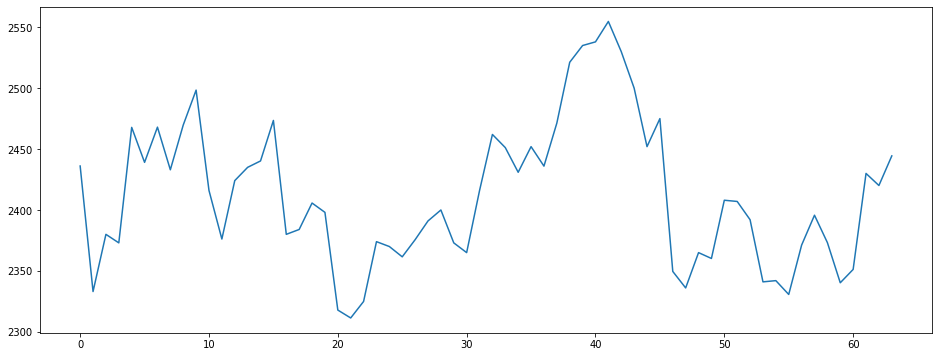

In [64]:
dataset['Open Price'].plot(figsize=(16,6))

In [66]:
x = dataset[['Open Price','High Price', 'Low Price','Average Price']]
y = dataset['Last Price']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state=0)

In [72]:
x_train.shape

(48, 4)

In [74]:
x_test.shape

(16, 4)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [76]:
regressor.fit(x_train, y_train)

LinearRegression()

In [77]:
print(regressor.coef_)

[-0.57465096  0.46132601  0.30919008  0.73976691]


In [78]:
print(regressor.intercept_)

153.0681893763085


In [79]:
predict = regressor.predict(x_test)

In [80]:
print(x_test)

    Open Price  High Price  Low Price  Average Price
45     2475.00     2504.75    2355.10        2418.60
29     2373.00     2383.90    2360.00        2370.53
43     2500.05     2509.95    2455.00        2480.98
61     2430.00     2433.00    2395.95        2417.77
34     2430.95     2458.05    2411.55        2436.73
33     2451.20     2454.00    2409.00        2423.21
31     2415.90     2461.00    2404.00        2437.26
40     2538.00     2565.00    2537.00        2555.10
26     2375.60     2404.85    2373.05        2389.02
62     2420.10     2454.90    2410.00        2439.61
22     2324.90     2371.90    2322.00        2346.81
2      2380.00     2409.90    2343.55        2376.12
11     2376.15     2404.00    2360.00        2387.87
28     2400.00     2404.95    2345.60        2366.88
54     2342.00     2356.80    2305.00        2330.89
4      2467.80     2477.60    2401.50        2433.36


In [83]:
predict.shape

(16,)

In [85]:
dframe=pd.DataFrame(y_test, predict)

In [87]:
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predict})

In [88]:
print(dfr)


    Actual Price  Predicted Price
45       2379.90      2403.687198
29       2368.50      2372.504783
43       2482.10      2468.725836
61       2407.65      2408.462758
34       2439.90      2438.322402
33       2419.15      2414.027267
31       2460.00      2446.389502
40       2553.00      2552.498939
26       2404.00      2398.388692
62       2441.00      2444.755472
22       2365.00      2365.313088
2        2343.55      2379.525823
11       2382.00      2392.794844
28       2364.00      2359.547634
54       2319.40      2331.487214
4        2405.10      2420.565063


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
regressor.score(x_test, y_test)

0.9435804582070929

In [91]:
import math

In [92]:
graph=dfr.head(30)

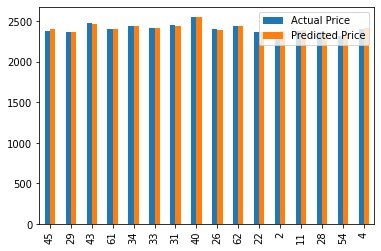

In [96]:
graph.plot(kind='bar')